## ACTD 2024 - 20

### Clases 11-12: Introducción a redes neuronales

- Redes densas
- Redes para regresión
- Funciones de activación y pérdida

Empecemos importando numpy y pandas

In [1]:
import numpy as np
import pandas as pd

Carguemos el archivo auto-mpg.data (disponible en Bloque Neón) usando pandas. Note que debemos incluir los nombres de las columnas, además de indicar los caracteres para separación, nas y comentarios.

In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

Exploremos las primeras filas del dataframe.

In [3]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


- MPG: miles per gallon
- Cylinders: # de cilindros
- Displacement: volumen desplazado por los pistones
- Horsepower: caballos de potencia
- Weight: peso
- Acceleration: aceleración
- Model Year: año/modelo
- Origin: 1:USA, 2:Europa, 3:Japón

Exploremos el tamaño del df

In [4]:
df.shape

(398, 8)

Identificamos NAs en los datos

In [5]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(392, 8)

Codifiquemos la variable categórica Origin

In [8]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: Origin, Length: 392, dtype: object

In [9]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [10]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [11]:
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


In [12]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

In [13]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


Separamos los datos en entrenamiento y prueba

In [14]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,20.0,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,26.0,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,31.5,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,20.2,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,30.0,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [15]:
test = df.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,0,0,1
13,14.0,8,455.0,225.0,3086.0,10.0,70,0,0,1


In [16]:
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


Realicemos una exploración descriptiva de los datos, calculando inicialmente estadísticas de cada variable continua

In [17]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.579299,5.455414,192.562102,103.767516,2959.312102,15.518471,75.964968,0.171975,0.219745,0.608280
std,7.877216,1.691811,103.701434,38.123560,856.880939,2.705097,3.672110,0.377961,0.414735,0.488914
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.125000,4.000000,98.000000,75.000000,2193.000000,13.900000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,146.000000,94.500000,2764.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.375000,8.000000,260.000000,120.000000,3612.000000,17.000000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


Exploremos relaciones bivariadas con pairplot de seaborn

In [18]:
import seaborn as sns

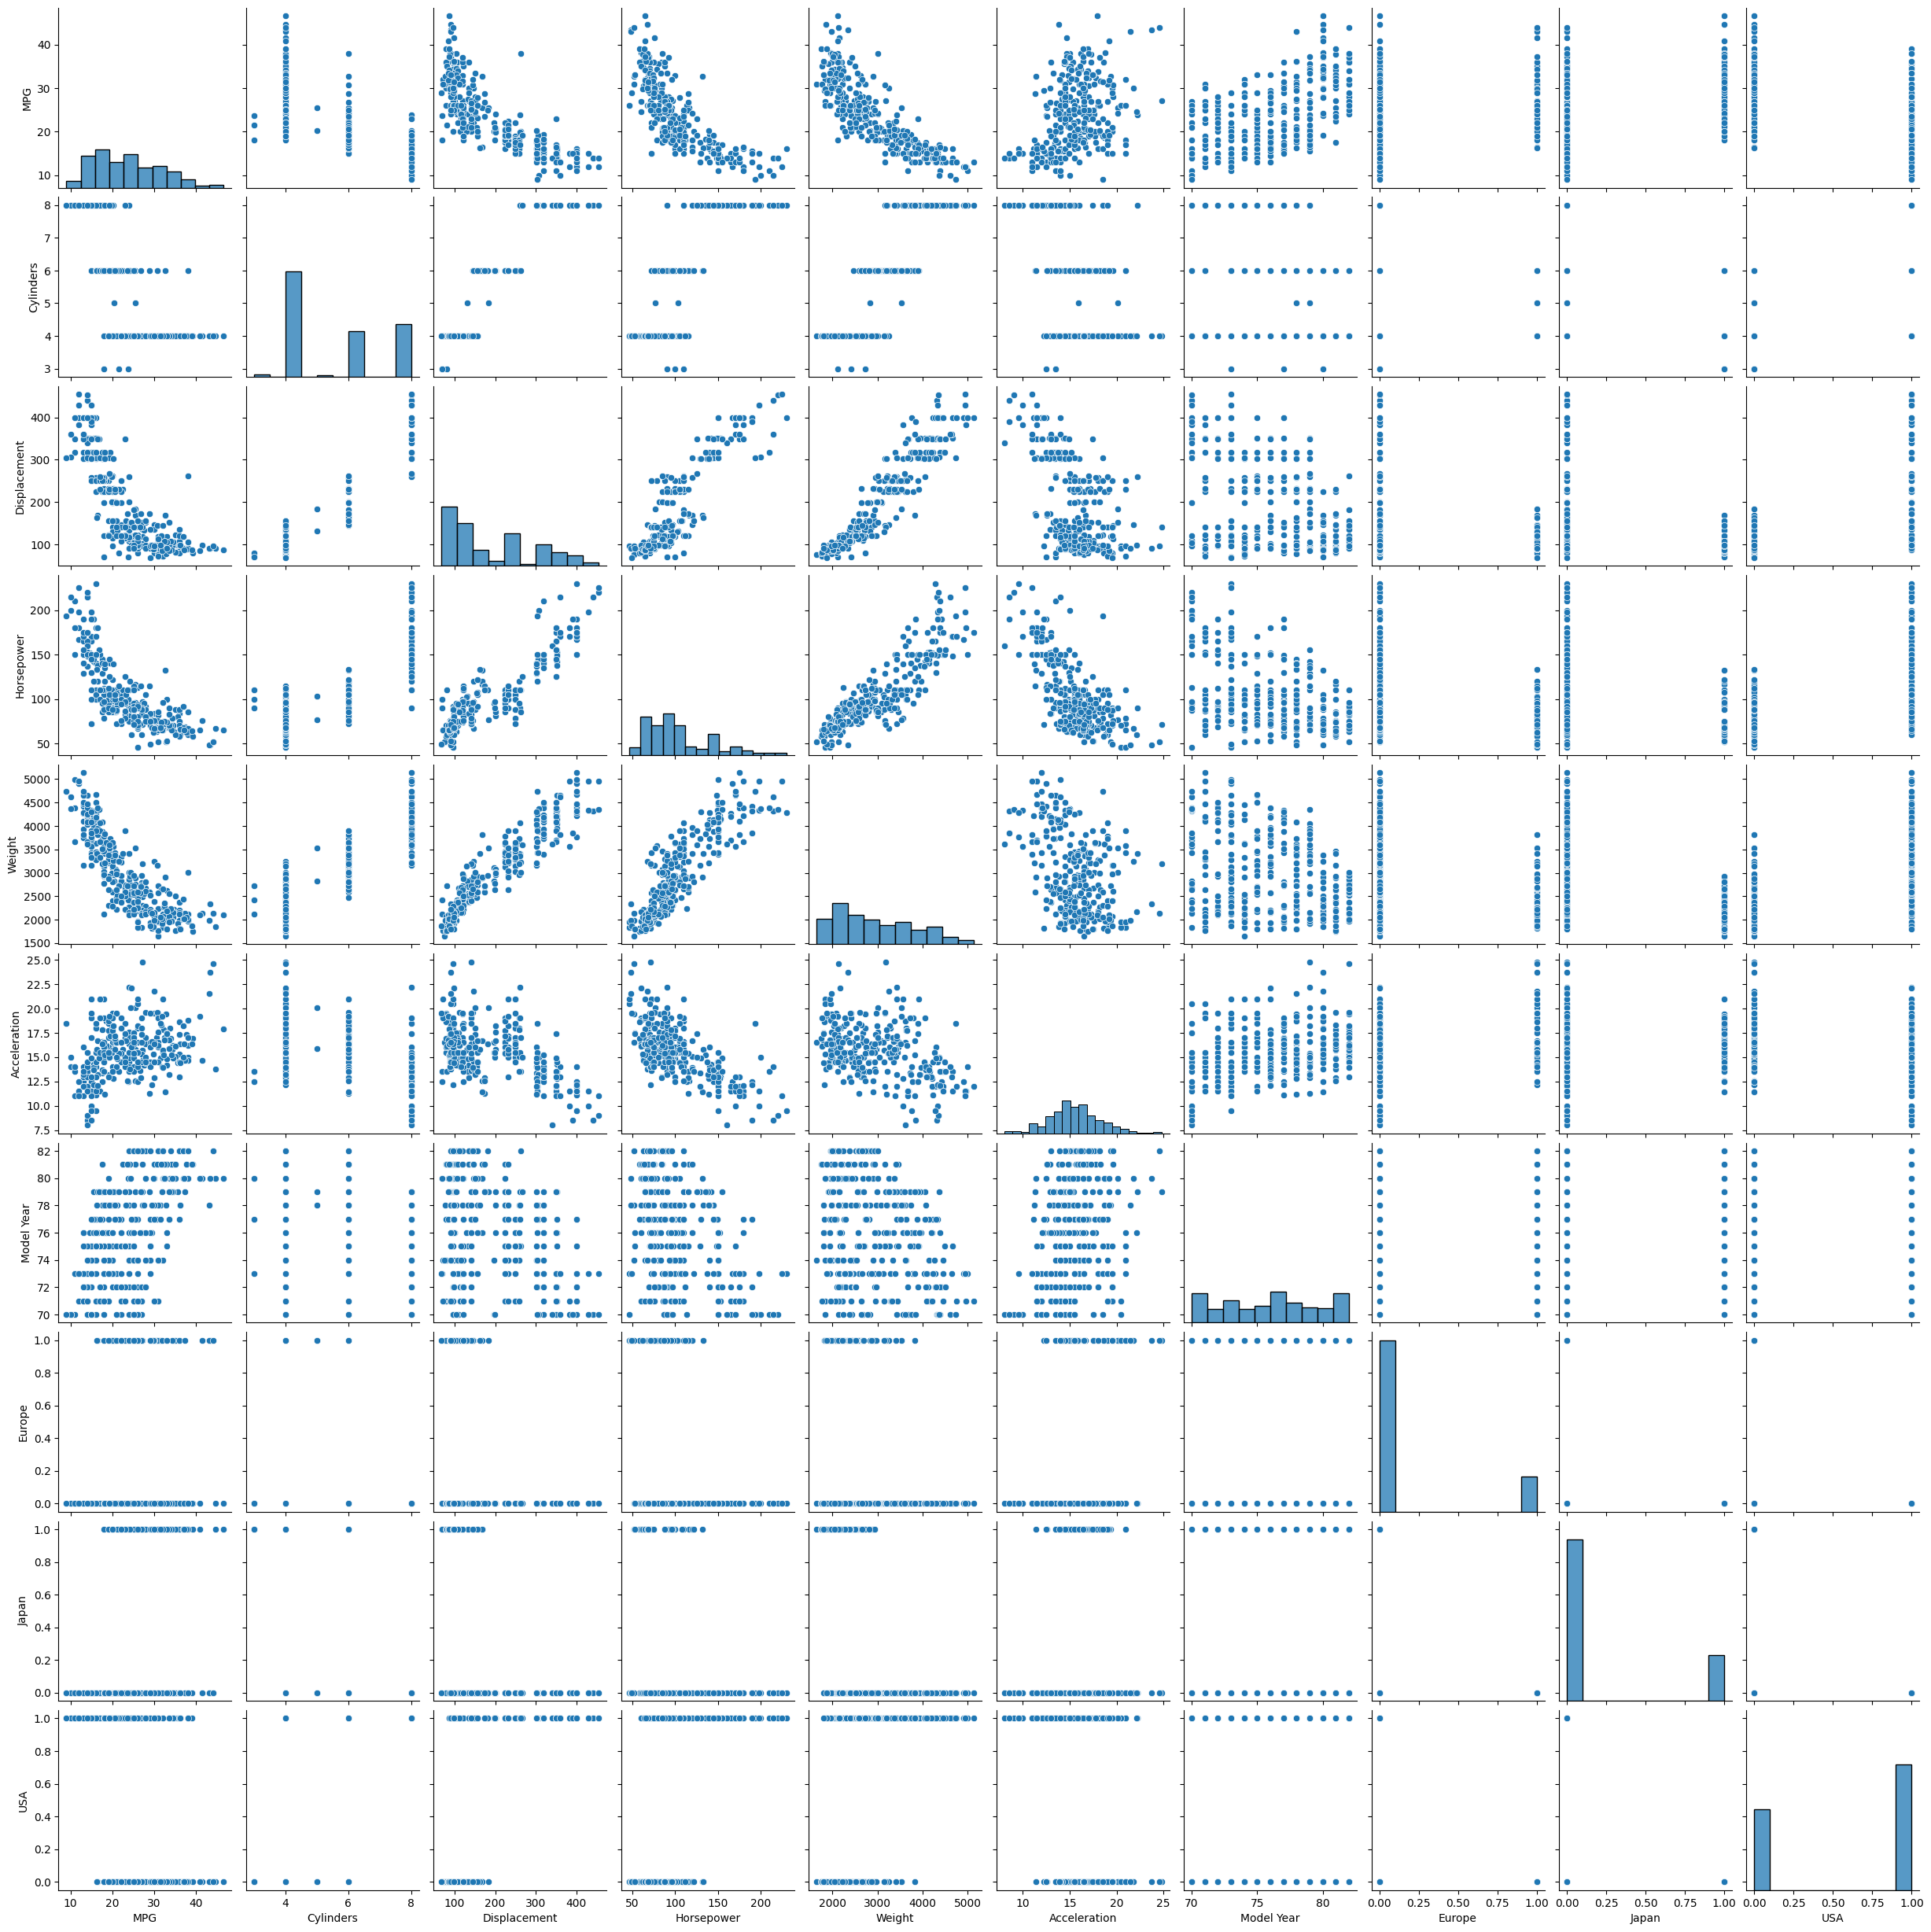

In [19]:
sns.pairplot(train)

Calculemos la matriz de correlacion

In [20]:
train.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
MPG,1.000000,-0.777230,-0.807032,-0.775493,-0.832793,0.389422,0.596816,0.249298,0.455161,-0.578826
Cylinders,-0.777230,1.000000,0.950858,0.849237,0.901259,-0.488703,-0.330668,-0.352708,-0.416286,0.625791
Displacement,-0.807032,0.950858,1.000000,0.893640,0.941913,-0.523473,-0.364236,-0.372541,-0.455127,0.674072
Horsepower,-0.775493,0.849237,0.893640,1.000000,0.875157,-0.672989,-0.414065,-0.291224,-0.327337,0.502808
Weight,-0.832793,0.901259,0.941913,0.875157,1.000000,-0.402870,-0.318231,-0.304870,-0.454284,0.621043
Acceleration,0.389422,-0.488703,-0.523473,-0.672989,-0.402870,1.000000,0.258013,0.195310,0.110850,-0.245018
Model Year,0.596816,-0.330668,-0.364236,-0.414065,-0.318231,0.258013,1.000000,-0.062402,0.237930,-0.153590
Europe,0.249298,-0.352708,-0.372541,-0.291224,-0.304870,0.195310,-0.062402,1.000000,-0.241853,-0.567903
Japan,0.455161,-0.416286,-0.455127,-0.327337,-0.454284,0.110850,0.237930,-0.241853,1.000000,-0.661311
USA,-0.578826,0.625791,0.674072,0.502808,0.621043,-0.245018,-0.153590,-0.567903,-0.661311,1.000000


<Axes: >

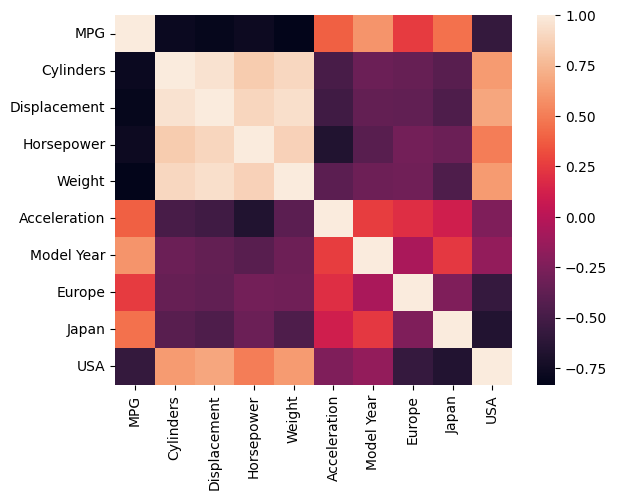

In [21]:
sns.heatmap(train.corr())

Seleccionamos ahora las características y las etiquetas (MPG)

In [22]:
train_X = train.copy()
test_X = test.copy()

In [23]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [24]:
train_X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [25]:
train_y.head()

125    20.0
142    26.0
278    31.5
254    20.2
328    30.0
Name: MPG, dtype: float64

In [26]:
train_X.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Europe            int32
Japan             int32
USA               int32
dtype: object

Construyamos los modelos usando tensorflow

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.17.0'

Capa de normalización y Variables Base

In [29]:
tf.keras.layers.Normalization

keras.src.layers.preprocessing.normalization.Normalization

In [30]:
Variables = ["Displacement", "Horsepower", "Weight", "Acceleration"]
Cantidad = len(Variables)

## Modelos Base

In [31]:
Var_Base = np.array(train_X[Variables])

In [32]:
norm_base = tf.keras.layers.Normalization(input_shape=[Cantidad,])

c:\Users\Jeronimo Vargas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
norm_base.adapt(Var_Base)

In [34]:
import matplotlib.pyplot as plt

In [35]:
test_res = {}

In [36]:
test_res

{}

In [37]:
modelo_base = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [38]:
modelo_base.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


In [39]:
modelo_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [40]:
%%time
history_Base = modelo_base.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 24.3474 - val_loss: 22.0003
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.9787 - val_loss: 21.5476
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.4009 - val_loss: 20.9683
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.2281 - val_loss: 20.1747
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.3280 - val_loss: 19.1003
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.6009 - val_loss: 17.6621
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.9797 - val_loss: 16.0940
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.4126 - val_loss: 14.5902
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.1920 - val_loss: 13.0806
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.2121 - val_loss: 11.1492
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.5479 - val_loss: 8.9494
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.841

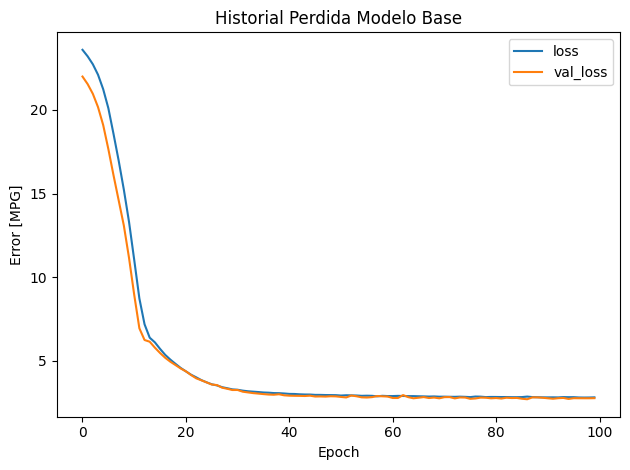

In [41]:
plt.plot(history_Base.history['loss'], label='loss')
plt.plot(history_Base.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial Perdida Modelo Base")
plt.legend()
plt.tight_layout()
plt.savefig("Perdida_Modelo_Base.png")

In [42]:
test_res['Modelo_Base'] = modelo_base.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [43]:
test_res

{'Modelo_Base': 2.6597766876220703}

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


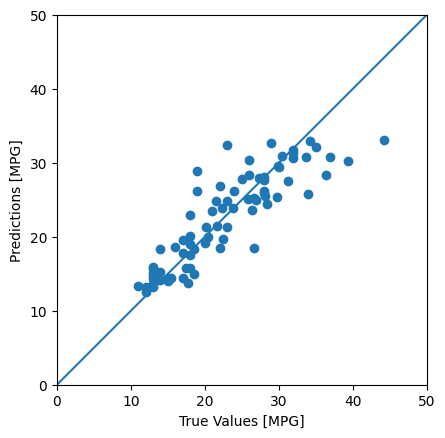

In [44]:
test_pred_base = modelo_base.predict(test_X[Variables]).flatten()

plt.axes(aspect='equal')
plt.scatter(test_y, test_pred_base)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims)

## Modelos Distintas Neuronas

### 16 Neuronas

In [45]:
modelo_16_Neuronas = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [46]:
modelo_16_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [47]:
modelo_16_Neuronas.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 9 (40.00 B)

In [48]:
%%time
history_16_Neuronas = modelo_16_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 23.9091 - val_loss: 22.4082
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.5295 - val_loss: 22.3008
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.0875 - val_loss: 22.1960
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.3859 - val_loss: 22.0872
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.4489 - val_loss: 21.9678
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.4088 - val_loss: 21.8391
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.5732 - val_loss: 21.6963
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.1768 - val_loss: 21.5292
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.9792 - val_loss: 21.3294
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.5051 - val_loss: 21.0904
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.0814 - val_loss: 20.8174
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.6

In [49]:
test_res['Modelo_16_Neuronas'] = modelo_16_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [50]:
test_res

{'Modelo_Base': 2.6597766876220703, 'Modelo_16_Neuronas': 2.7779500484466553}

### 32 Neuronas

In [51]:
modelo_32_Neuronas = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [52]:
modelo_32_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [53]:
modelo_32_Neuronas.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,258 (4.92 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 9 (40.00 B)

In [54]:
%%time
history_32_Neuronas = modelo_32_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 24.2717 - val_loss: 22.2841
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.2921 - val_loss: 22.0546
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 23.6676 - val_loss: 21.8032
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.2159 - val_loss: 21.5147
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.9324 - val_loss: 21.1647
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.1357 - val_loss: 20.7339
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.4077 - val_loss: 20.1927
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 21.2346 - val_loss: 19.5339
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.4256 - val_loss: 18.7636
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.3925 - val_loss: 17.9459
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.9381 - val_loss: 17.1868
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - l

In [55]:
test_res['Modelo_32_Neuronas'] = modelo_32_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [56]:
test_res

{'Modelo_Base': 2.6597766876220703,
 'Modelo_16_Neuronas': 2.7779500484466553,
 'Modelo_32_Neuronas': 2.7137153148651123}

### 64 Neuronas

In [57]:
modelo_64_Neuronas = tf.keras.Sequential([
      norm_base,
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
  ])

In [58]:
modelo_64_Neuronas.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [59]:
modelo_64_Neuronas.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [60]:
%%time
history_64_Neuronas = modelo_64_Neuronas.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 23.8344 - val_loss: 22.2900
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.8418 - val_loss: 21.8885
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.3159 - val_loss: 21.4593
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.6403 - val_loss: 20.9080
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.1360 - val_loss: 20.1487
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.0185 - val_loss: 19.1347
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.8808 - val_loss: 17.8188
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.1167 - val_loss: 16.3786
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.1639 - val_loss: 14.8102
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.4530 - val_loss: 13.2786
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.4256 - val_loss: 11.7504
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12.2794 - val_l

In [61]:
test_res['Modelo_64_Neuronas'] = modelo_64_Neuronas.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [62]:
test_res

{'Modelo_Base': 2.6597766876220703,
 'Modelo_16_Neuronas': 2.7779500484466553,
 'Modelo_32_Neuronas': 2.7137153148651123,
 'Modelo_64_Neuronas': 2.626805543899536}

### Graficas

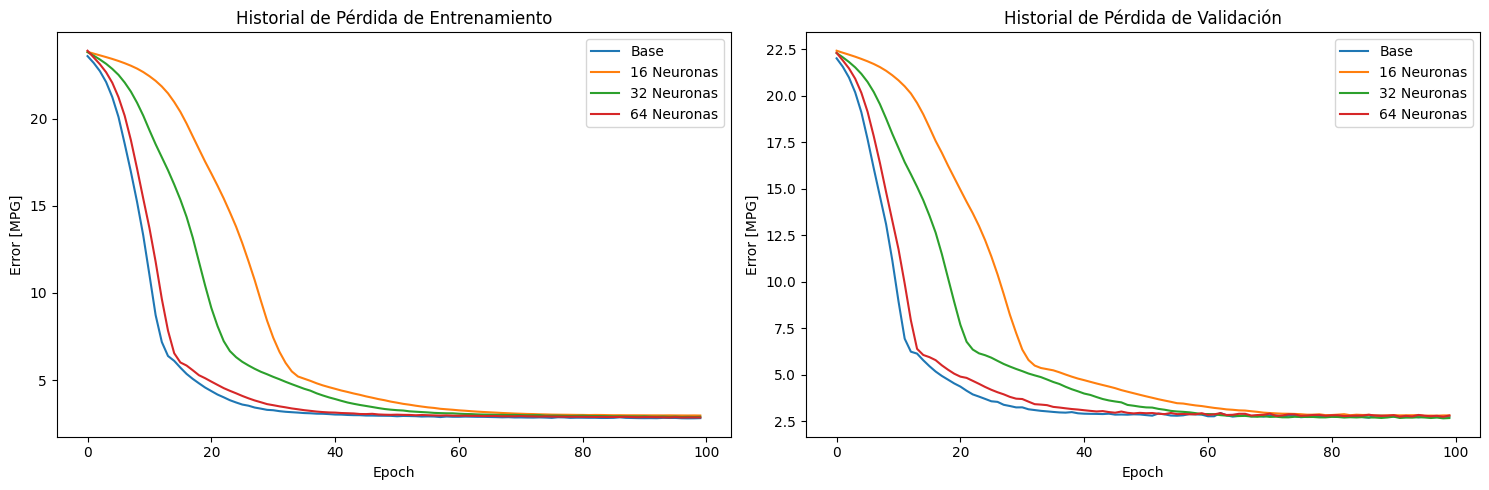

In [63]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_16_Neuronas.history['loss'], label='16 Neuronas')
plt.plot(history_32_Neuronas.history['loss'], label='32 Neuronas')
plt.plot(history_64_Neuronas.history['loss'], label='64 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_16_Neuronas.history['val_loss'], label='16 Neuronas')
plt.plot(history_32_Neuronas.history['val_loss'], label='32 Neuronas')
plt.plot(history_64_Neuronas.history['val_loss'], label='64 Neuronas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Neuronas.png")

## Modelos Distintas Capas

### 1 Capa

In [64]:
modelo_1_Capa = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [65]:
modelo_1_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [66]:
modelo_1_Capa.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394 (1.54 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 9 (40.00 B)

In [67]:
%%time
history_1_Capa = modelo_1_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 24.1532 - val_loss: 22.2153
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.6505 - val_loss: 22.0266
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.0041 - val_loss: 21.8411
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.0830 - val_loss: 21.6538
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.9124 - val_loss: 21.4623
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.7581 - val_loss: 21.2665
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.1075 - val_loss: 21.0610
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.7260 - val_loss: 20.8418
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.0169 - val_loss: 20.6122
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.8897 - val_loss: 20.3627
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.1785 - val_loss: 20.1034
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss

In [68]:
test_res['Modelo_1_Capa'] = modelo_1_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [69]:
test_res

{'Modelo_Base': 2.6597766876220703,
 'Modelo_16_Neuronas': 2.7779500484466553,
 'Modelo_32_Neuronas': 2.7137153148651123,
 'Modelo_64_Neuronas': 2.626805543899536,
 'Modelo_1_Capa': 2.782904863357544}

### 5 Capas

In [70]:
modelo_5_Capa = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [71]:
modelo_5_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [72]:
modelo_5_Capa.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,034 (66.54 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 9 (40.00 B)

In [73]:
%%time
history_5_Capa = modelo_5_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 23.5820 - val_loss: 22.1640
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.1785 - val_loss: 21.2943
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.9587 - val_loss: 18.9833
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.6017 - val_loss: 13.9429
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.0047 - val_loss: 9.1679
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.6300 - val_loss: 8.5624
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.0323 - val_loss: 5.6742
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3389 - val_loss: 5.4441
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.3462 - val_loss: 4.8424
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7881 - val_loss: 4.4920
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.5661 - val_loss: 4.3959
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3903 - 

In [74]:
test_res['Modelo_5_Capa'] = modelo_5_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [75]:
test_res

{'Modelo_Base': 2.6597766876220703,
 'Modelo_16_Neuronas': 2.7779500484466553,
 'Modelo_32_Neuronas': 2.7137153148651123,
 'Modelo_64_Neuronas': 2.626805543899536,
 'Modelo_1_Capa': 2.782904863357544,
 'Modelo_5_Capa': 2.8313910961151123}

### 10 Capas

In [76]:
modelo_10_Capa = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [77]:
modelo_10_Capa.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [78]:
modelo_10_Capa.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,834 (147.79 KB)

 Trainable params: 37,825 (147.75 KB)

 Non-trainable params: 9 (40.00 B)

In [79]:
%%time
history_10_Capa = modelo_10_Capa.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 23.6603 - val_loss: 21.7553
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.1446 - val_loss: 17.4215
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.9053 - val_loss: 11.5046
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.8273 - val_loss: 7.0116
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.4209 - val_loss: 5.7848
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0016 - val_loss: 4.5380
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.6872 - val_loss: 3.9975
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.0617 - val_loss: 3.8883
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.6775 - val_loss: 3.5825
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3958 - val_loss: 3.2695
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.1057 - val_loss: 3.1797
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.1673 - 

In [80]:
test_res['Modelo_10_Capa'] = modelo_10_Capa.evaluate(
    test_X[Variables], test_y,
    verbose=0)

In [81]:
test_res

{'Modelo_Base': 2.6597766876220703,
 'Modelo_16_Neuronas': 2.7779500484466553,
 'Modelo_32_Neuronas': 2.7137153148651123,
 'Modelo_64_Neuronas': 2.626805543899536,
 'Modelo_1_Capa': 2.782904863357544,
 'Modelo_5_Capa': 2.8313910961151123,
 'Modelo_10_Capa': 3.3898682594299316}

### Gráficas

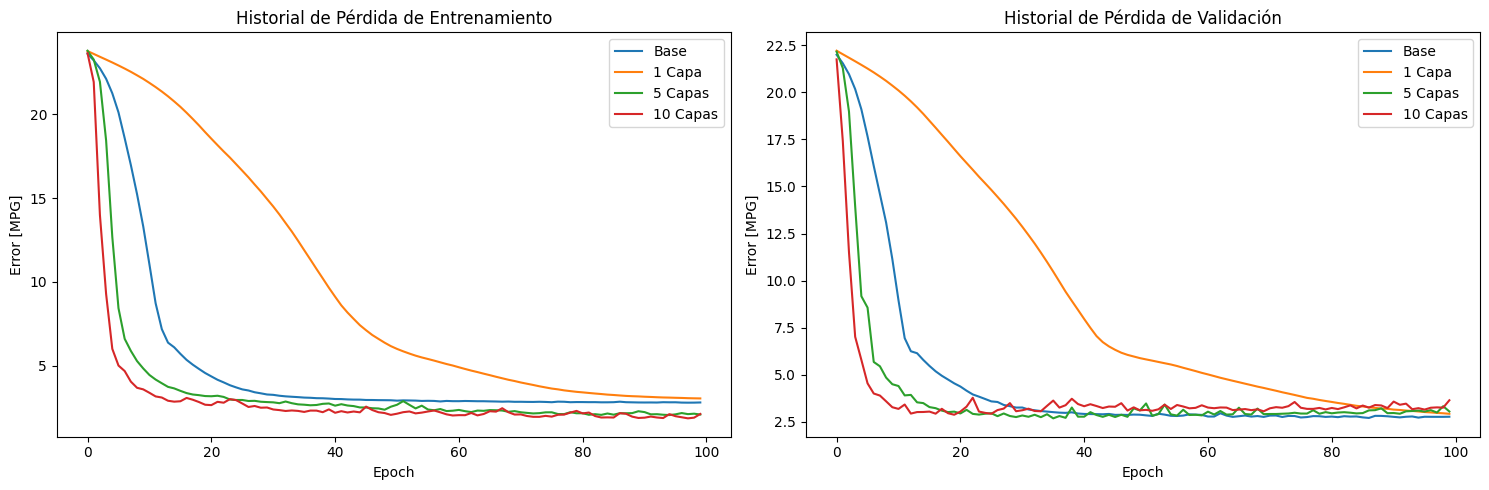

In [82]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_1_Capa.history['loss'], label='1 Capa')
plt.plot(history_5_Capa.history['loss'], label='5 Capas')
plt.plot(history_10_Capa.history['loss'], label='10 Capas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_1_Capa.history['val_loss'], label='1 Capa')
plt.plot(history_5_Capa.history['val_loss'], label='5 Capas')
plt.plot(history_10_Capa.history['val_loss'], label='10 Capas')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Capas.png")

## Modelos Distintas Funciones Activación

### TanH

In [83]:
modelo_TanH = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='tanh'),
      tf.keras.layers.Dense(64, activation='tanh'),
      tf.keras.layers.Dense(1)
  ])

modelo_TanH.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [84]:
modelo_TanH.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [85]:
%%time
history_TanH = modelo_TanH.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_TanH'] = modelo_TanH.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 23.8295 - val_loss: 22.3495
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.1343 - val_loss: 22.1955
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.3098 - val_loss: 22.0137
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.4448 - val_loss: 21.7642
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.3998 - val_loss: 21.4115
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.9369 - val_loss: 20.9466
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.8195 - val_loss: 20.3497
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.5247 - val_loss: 19.5447
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19.9884 - val_loss: 18.4366
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.7216 - val_loss: 16.9585
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.7596 - val_loss: 14.9220
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss:

{'Modelo_Base': 2.6597766876220703,
 'Modelo_16_Neuronas': 2.7779500484466553,
 'Modelo_32_Neuronas': 2.7137153148651123,
 'Modelo_64_Neuronas': 2.626805543899536,
 'Modelo_1_Capa': 2.782904863357544,
 'Modelo_5_Capa': 2.8313910961151123,
 'Modelo_10_Capa': 3.3898682594299316,
 'Modelo_TanH': 2.8520593643188477}

### Sigmoide

In [86]:
modelo_Sig = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='sigmoid'),
      tf.keras.layers.Dense(64, activation='sigmoid'),
      tf.keras.layers.Dense(1)
  ])

modelo_Sig.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [87]:
modelo_Sig.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [88]:
%%time
history_Sig = modelo_Sig.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_Sig'] = modelo_Sig.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 24.1335 - val_loss: 21.7507
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.7461 - val_loss: 20.9634
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.7540 - val_loss: 20.2000
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.1372 - val_loss: 19.4682
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.7428 - val_loss: 18.7750
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.1839 - val_loss: 18.1229
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.3731 - val_loss: 17.5117
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.4816 - val_loss: 16.9388
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.9505 - val_loss: 16.3996
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.9980 - val_loss: 15.8882
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.3075 - val_loss: 15.3997
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.

{'Modelo_Base': 2.6597766876220703,
 'Modelo_16_Neuronas': 2.7779500484466553,
 'Modelo_32_Neuronas': 2.7137153148651123,
 'Modelo_64_Neuronas': 2.626805543899536,
 'Modelo_1_Capa': 2.782904863357544,
 'Modelo_5_Capa': 2.8313910961151123,
 'Modelo_10_Capa': 3.3898682594299316,
 'Modelo_TanH': 2.8520593643188477,
 'Modelo_Sig': 3.2622551918029785}

### Softmax

In [89]:
modelo_Soft = tf.keras.Sequential([
      norm_base,
      tf.keras.layers.Dense(64, activation='softmax'),
      tf.keras.layers.Dense(64, activation='softmax'),
      tf.keras.layers.Dense(1)
  ])

modelo_Soft.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [90]:
modelo_Soft.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,554 (17.79 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 9 (40.00 B)

In [91]:
%%time
history_Soft = modelo_Soft.fit(
    train_X[Variables],
    train_y,
    validation_split=0.2,
    epochs=100)

test_res['Modelo_Soft'] = modelo_Soft.evaluate(
    test_X[Variables], test_y,
    verbose=0)

test_res

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 23.7992 - val_loss: 22.4478
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.2704 - val_loss: 22.4294
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.8632 - val_loss: 22.4111
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.0911 - val_loss: 22.3928
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.2853 - val_loss: 22.3745
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.8611 - val_loss: 22.3561
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.5967 - val_loss: 22.3378
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.2023 - val_loss: 22.3195
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.9221 - val_loss: 22.3011
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.6820 - val_loss: 22.2828
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.9491 - val_loss: 22.2644
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss:

{'Modelo_Base': 2.6597766876220703,
 'Modelo_16_Neuronas': 2.7779500484466553,
 'Modelo_32_Neuronas': 2.7137153148651123,
 'Modelo_64_Neuronas': 2.626805543899536,
 'Modelo_1_Capa': 2.782904863357544,
 'Modelo_5_Capa': 2.8313910961151123,
 'Modelo_10_Capa': 3.3898682594299316,
 'Modelo_TanH': 2.8520593643188477,
 'Modelo_Sig': 3.2622551918029785,
 'Modelo_Soft': 20.91922950744629}

### Gráficas

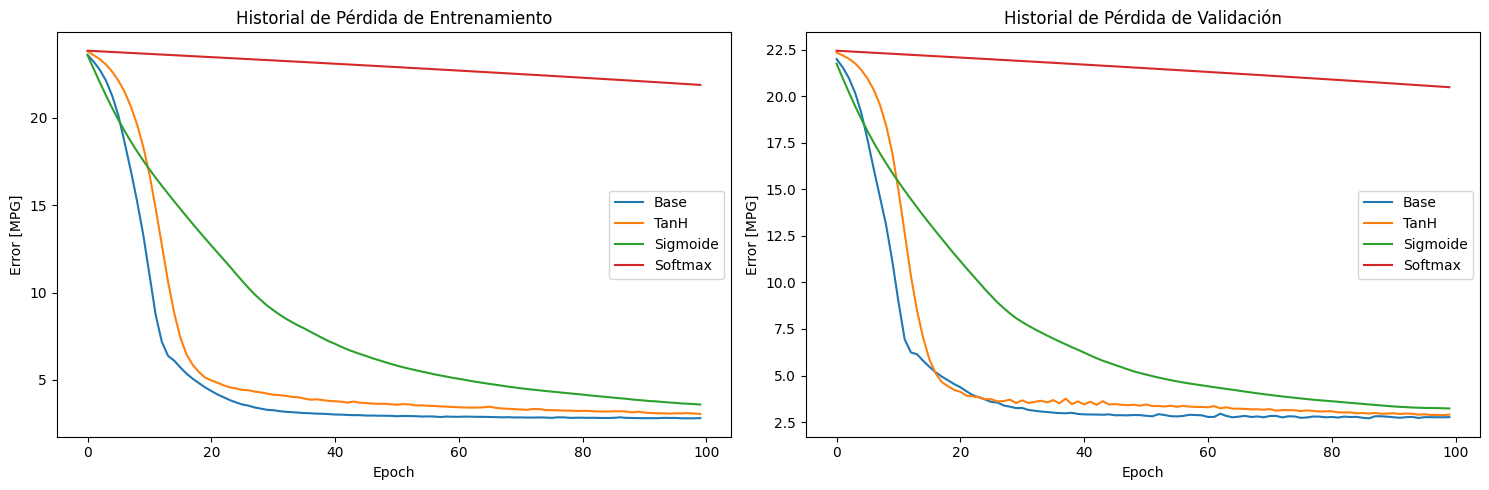

In [92]:
#Entrenamiento
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(history_Base.history['loss'], label='Base')
plt.plot(history_TanH.history['loss'], label='TanH')
plt.plot(history_Sig.history['loss'], label='Sigmoide')
plt.plot(history_Soft.history['loss'], label='Softmax')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Entrenamiento")
plt.legend()

#Validación
plt.subplot(1,2,2)

plt.plot(history_Base.history['val_loss'], label='Base')
plt.plot(history_TanH.history['val_loss'], label='TanH')
plt.plot(history_Sig.history['val_loss'], label='Sigmoide')
plt.plot(history_Soft.history['val_loss'], label='Softmax')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Historial de Pérdida de Validación")
plt.legend()


plt.tight_layout()
plt.savefig("Perdida_Funcion.png")